<a href="https://colab.research.google.com/github/AlvaroBecker/CodingDojoTareas-/blob/main/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
#Importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score



In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:

#Importar datos sin indice
df = pd.read_csv('/content/drive/MyDrive/Coding_dojo/semana 9/cust_seg.csv',index_col=0)

In [23]:

#Explorar datos
df.head()



,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [24]:
df.shape


(850, 9)

In [25]:
df.describe()


,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [26]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 66.4 KB


In [27]:
df.isnull().sum()


Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [28]:
df.dtypes


Customer Id          int64
Age                  int64
Edu                  int64
Years Employed       int64
Income               int64
Card Debt          float64
Other Debt         float64
Defaulted          float64
DebtIncomeRatio    float64
dtype: object

In [29]:
df.columns


Index(['Customer Id', 'Age', 'Edu', 'Years Employed', 'Income', 'Card Debt',
       'Other Debt', 'Defaulted', 'DebtIncomeRatio'],
      dtype='object')

In [30]:
df.corr()


,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,1.000000,-0.004447,-0.031113,-0.035146,-0.017675,0.001015,-0.009061,-0.004244,0.014039
Age,-0.004447,1.000000,0.012983,0.554241,0.476218,0.278912,0.337839,-0.137657,0.008240
Edu,-0.031113,0.012983,1.000000,-0.151117,0.218219,0.099081,0.140938,0.114676,0.008053
Years Employed,-0.035146,0.554241,-0.151117,1.000000,0.625093,0.381744,0.414430,-0.282978,-0.033625
Income,-0.017675,0.476218,0.218219,0.625093,1.000000,0.551510,0.603356,-0.070970,-0.035585
Card Debt,0.001015,0.278912,0.099081,0.381744,0.551510,1.000000,0.644955,0.244734,0.514971
Other Debt,-0.009061,0.337839,0.140938,0.414430,0.603356,0.644955,1.000000,0.145716,0.572545
Defaulted,-0.004244,-0.137657,0.114676,-0.282978,-0.070970,0.244734,0.145716,1.000000,0.389575
DebtIncomeRatio,0.014039,0.008240,0.008053,-0.033625,-0.035585,0.514971,0.572545,0.389575,1.000000


In [31]:
df

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,6.8
846,847,28,2,7,34,0.359,2.021,0.0,7.0
847,848,25,4,0,18,2.802,3.210,1.0,33.4
848,849,32,1,12,28,0.116,0.696,0.0,2.9


In [32]:
df.groupby('Defaulted')['Defaulted'].count()

Defaulted
0.0    517
1.0    183
Name: Defaulted, dtype: int64

In [33]:
proporcion_unos = df['Defaulted'].sum() / df['Defaulted'].count()
proporcion_ceros = 1 - proporcion_unos

# Imputación basada en proporción
nan_indices = df[df['Defaulted'].isna()].index
unos_a_asignar = int(len(nan_indices) * proporcion_unos)
ceros_a_asignar = len(nan_indices) - unos_a_asignar

# Asignación de 1s y 0s a los valores NaN
indices_unos = np.random.choice(nan_indices, size=unos_a_asignar, replace=False)
indices_ceros = np.setdiff1d(nan_indices, indices_unos)

df.loc[indices_unos, 'Defaulted'] = 1
df.loc[indices_ceros, 'Defaulted'] = 0

In [34]:
df.isna().sum()

Customer Id        0
Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

<Axes: >

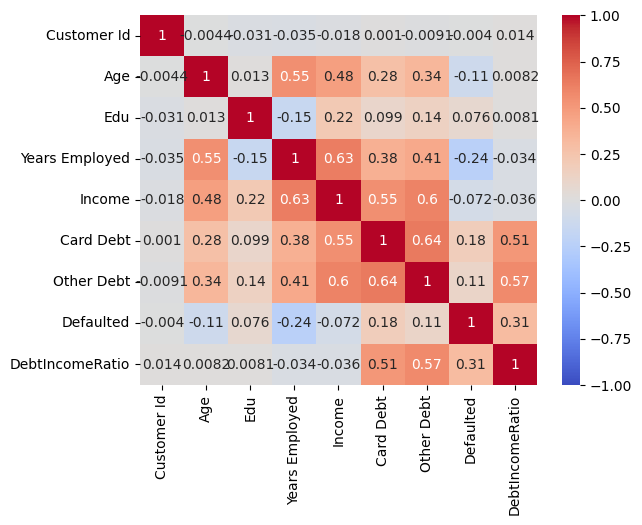

In [35]:
#mapa de calor
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

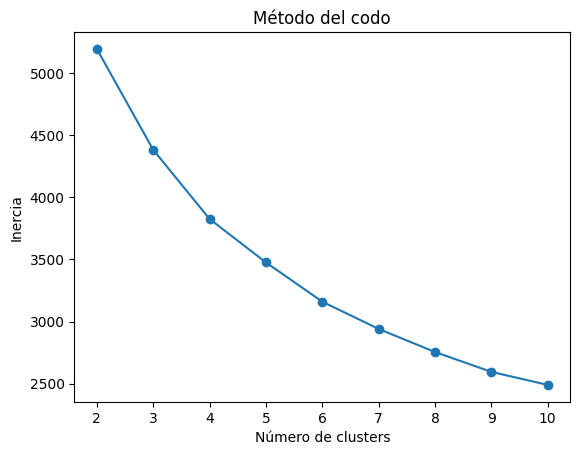

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [36]:
# Selecciona las características relevantes
X = df.drop(columns=['Customer Id'])

# Preprocesamiento: escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Método del codo para determinar el número óptimo de clusters
inertias = []
max_clusters = 11

for i in range(2, max_clusters):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Gráfico del método del codo
plt.plot(range(2, max_clusters), inertias, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del codo')
plt.show()

# Selecciona el número óptimo de clusters (puedes cambiar este valor según el gráfico del codo)
optimal_k = 4  # Cambia este valor según el gráfico del codo

# Entrenar y predecir los clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)
clusters = kmeans.predict(X_scaled)

# Añadir la columna 'Cluster' al DataFrame original
df['Cluster'] = clusters


In [37]:
# Asumiendo que ya has agregado la columna 'Cluster' al DataFrame original

# Agrupar los datos por 'Cluster' y calcular las estadísticas descriptivas para cada grupo
cluster_summary = df.groupby('Cluster').agg(
    Age=('Age', 'mean'),
    Edu=('Edu', 'mean'),
    Years_Employed=('Years Employed', 'mean'),
    Income=('Income', 'mean'),
    Card_Debt=('Card Debt', 'mean'),
    Other_Debt=('Other Debt', 'mean'),
    Defaulted=('Defaulted', 'mean'),
    DebtIncomeRatio=('DebtIncomeRatio', 'mean'),
    Count=('Cluster', 'count')
)

print(cluster_summary)


               Age       Edu  Years_Employed      Income  Card_Debt  \
Cluster                                                               
0        41.806604  1.641509       16.141509   73.259434   2.030113   
1        32.265356  1.668305        5.840295   31.213759   0.742550   
2        43.384615  2.230769       17.282051  138.615385   8.169923   
3        31.708333  1.770833        4.208333   31.421875   1.505562   

         Other_Debt  Defaulted  DebtIncomeRatio  Count  
Cluster                                                 
0          4.363585   0.061321         9.875000    212  
1          1.645233   0.000000         8.014005    407  
2         13.323128   0.487179        19.538462     39  
3          2.618047   0.989583        13.170312    192  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

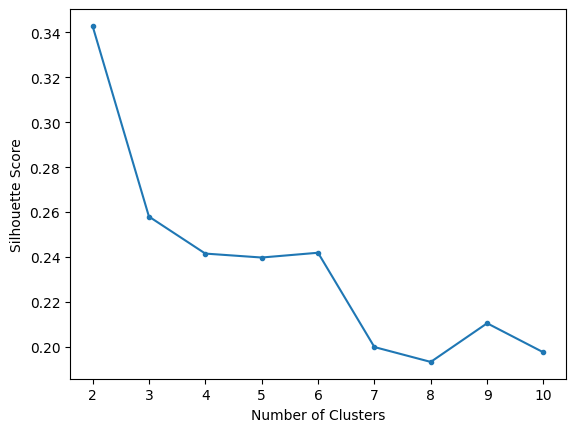

In [38]:
# Visualize different silhouette scores
# Save silhouette scores for various cluster numbers in list
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(X_scaled)
  silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

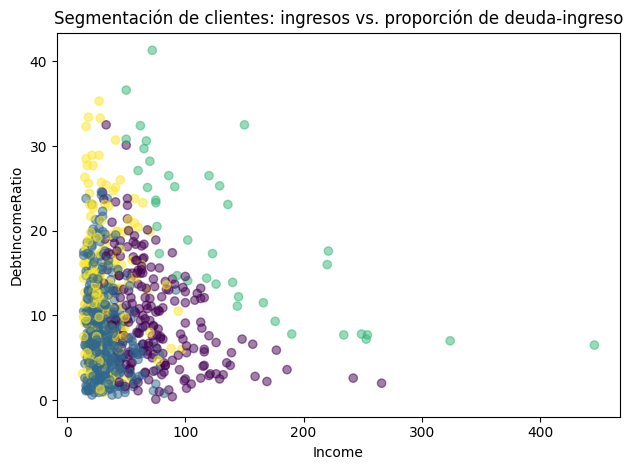

In [39]:
# Cree un gráfico de dispersión utilizando la columna 'Income' en el eje x y 'DebtIncomeRatio' en el eje y, coloreado por 'Cluster'
plt.scatter(df['Income'], df['DebtIncomeRatio'], c=df['Cluster'], cmap='viridis', alpha=0.5)

# Etiquetas y título
plt.xlabel('Income')
plt.ylabel('DebtIncomeRatio')
plt.title('Segmentación de clientes: ingresos vs. proporción de deuda-ingreso')

# Ajustar el espaciado entre los subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()
